## Load Data and Initial Grid Search

In [1]:
DATA_NAME = 'batch0approx1e5-agriVision-wavelet-red' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
RERUN = True
CWD

'/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/results/case-studies/agriVision/wavelet/batch0approx1e5/red'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [4]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples

{2: 9000,
 3: 36000,
 4: 144000,
 5: 576000,
 6: 2304000,
 7: 9216000,
 8: 36864000,
 9: 147456000,
 10: 589824000}

In [5]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

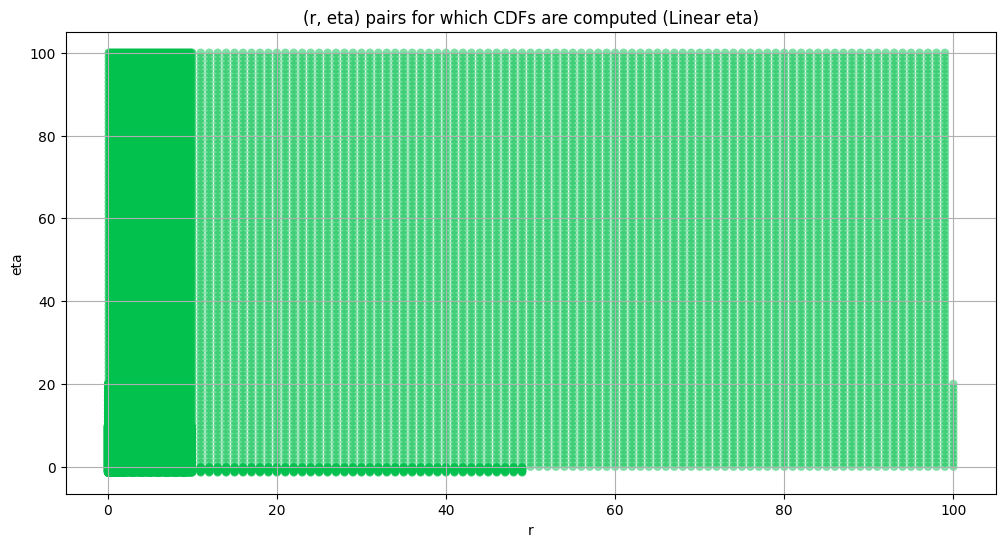

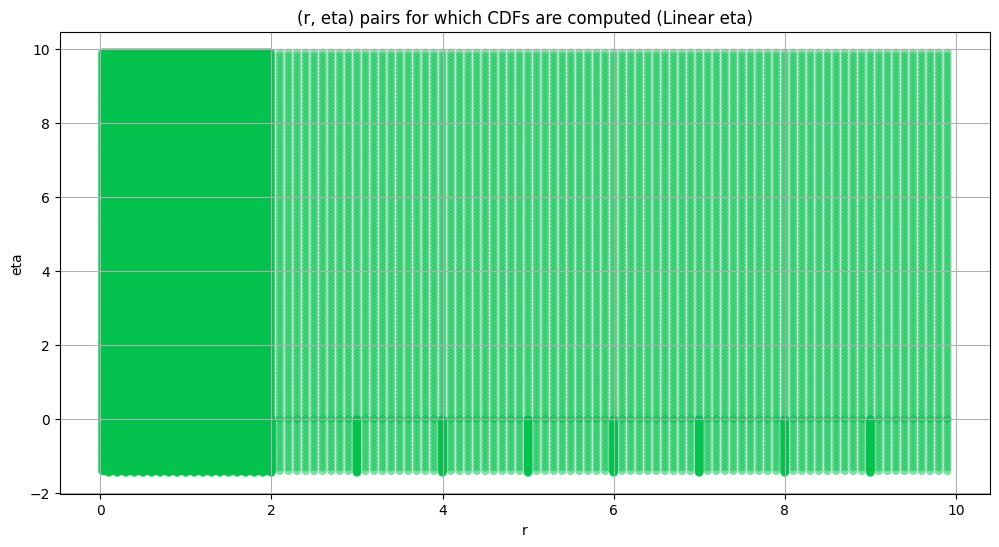

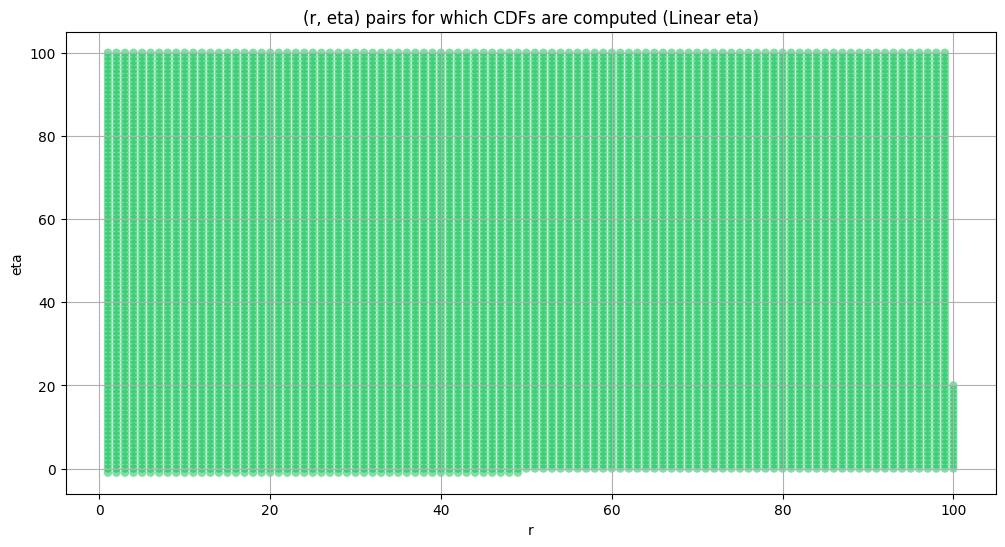

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


r           eta       variance      kurtosis
count  55966.000000  55966.000000   5.596600e+04  5.472500e+04
mean      11.556061     19.856190            inf           inf
std       22.037516     27.794814            inf           NaN
min        0.020000     -1.450000   0.000000e+00  4.787254e-04
25%        0.980000      2.000000   9.733362e-01  1.987414e-02
50%        1.930000      6.900000   1.381758e+00  2.368581e-01
75%        8.000000     26.000000   5.224203e+00  9.264833e-01
max      100.000000    100.000000  1.797693e+308           inf

In [6]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [7]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99

In [8]:
var_kurt_df_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not var_kurt_df_path.exists():
    for group in  GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
var_kurt_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
master_df

Layer 2


100%|██████████| 100000/100000 [01:37<00:00, 1022.06it/s]


Layer 3


100%|██████████| 100000/100000 [01:30<00:00, 1106.73it/s]


Layer 4


100%|██████████| 100000/100000 [01:16<00:00, 1307.56it/s]


Layer 5


100%|██████████| 100000/100000 [01:14<00:00, 1348.35it/s]


Layer 6


100%|██████████| 100000/100000 [01:27<00:00, 1144.39it/s]


Layer 7


100%|██████████| 100000/100000 [01:15<00:00, 1332.27it/s]


Layer 8


100%|██████████| 100000/100000 [01:18<00:00, 1281.38it/s]


Layer 9


100%|██████████| 100000/100000 [01:13<00:00, 1352.64it/s]


Layer 10


100%|██████████| 100000/100000 [01:15<00:00, 1326.97it/s]


obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  
layer                              
2       756.942381         9000.0  
3       561.888369        36000.0  
4      2700.459218       144000.0  
5      7123.889070       576000.0  
6      8727.643776      2304000.0  
7      8606.341394      9216000.0  
8      6916.660564     36864000.0  
9      6425.334046    147456000.0  
10     6695.153257    589824000.0

####
Layer  2


100%|██████████| 55966/55966 [00:36<00:00, 1552.26it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 9000, Without approximation : 9000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


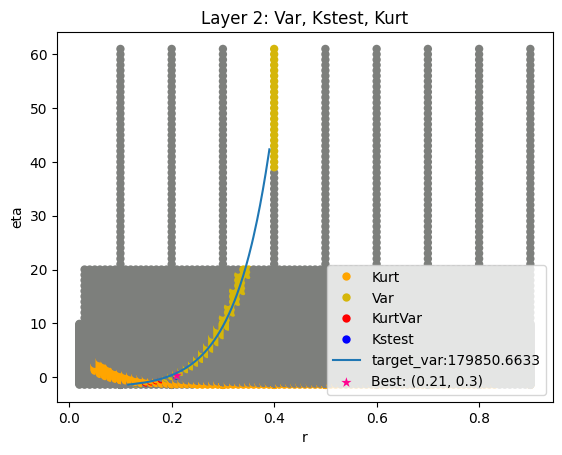

####
Layer  3


100%|██████████| 55966/55966 [01:53<00:00, 494.94it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 36000, Without approximation : 36000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


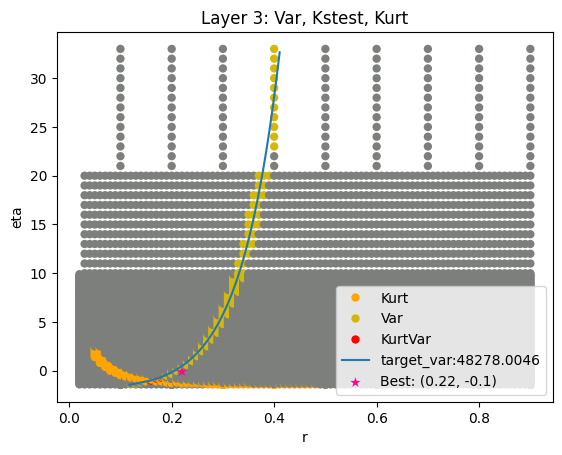

####
Layer  4


100%|██████████| 55966/55966 [05:17<00:00, 176.05it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 144000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


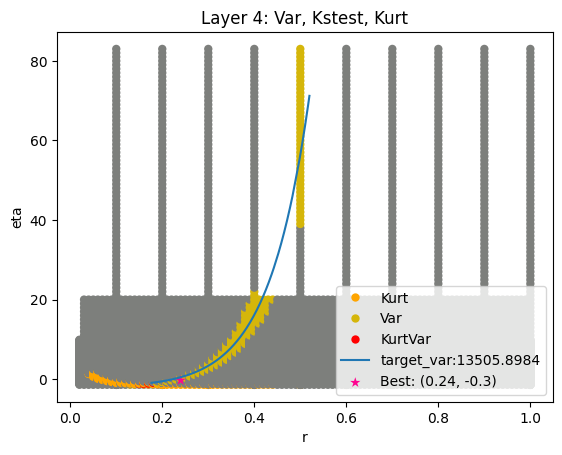

####
Layer  5


100%|██████████| 55966/55966 [04:59<00:00, 186.60it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 576000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


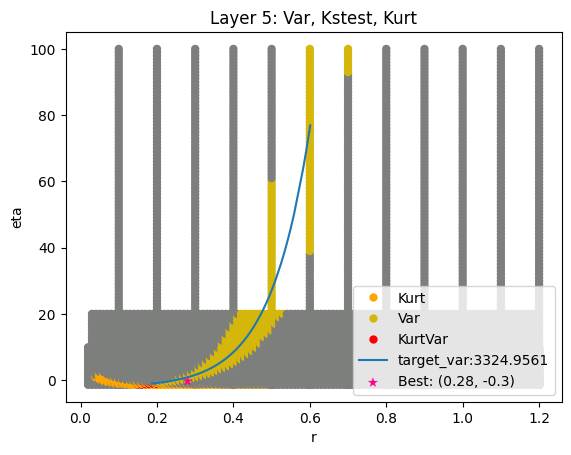

####
Layer  6


100%|██████████| 55966/55966 [05:02<00:00, 185.01it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 2304000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


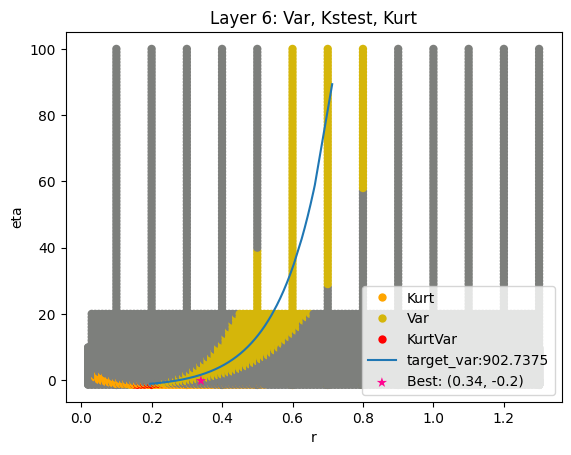

####
Layer  7


100%|██████████| 55966/55966 [04:57<00:00, 187.98it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 9216000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


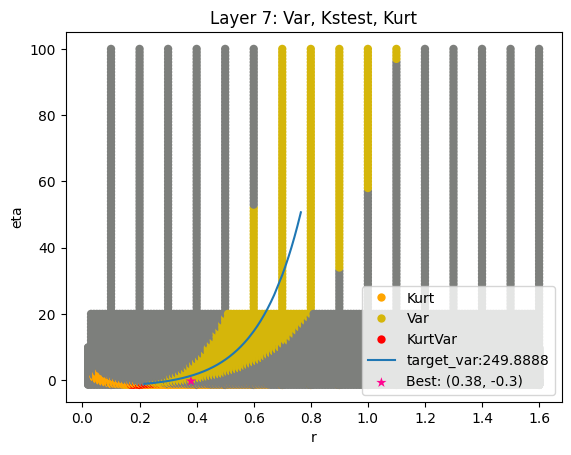

####
Layer  8


100%|██████████| 55966/55966 [05:01<00:00, 185.59it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 36864000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


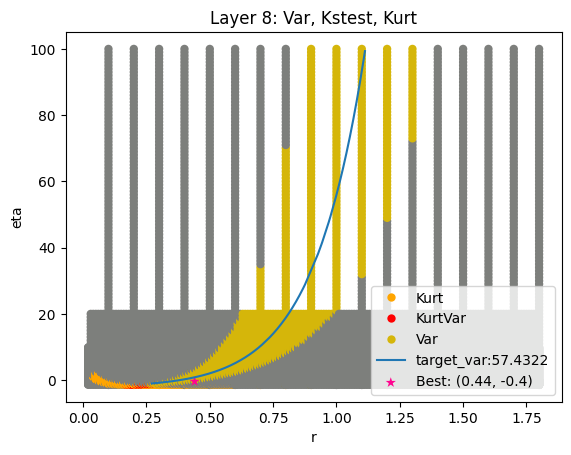

####
Layer  9


100%|██████████| 55966/55966 [05:09<00:00, 180.72it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 147456000.0


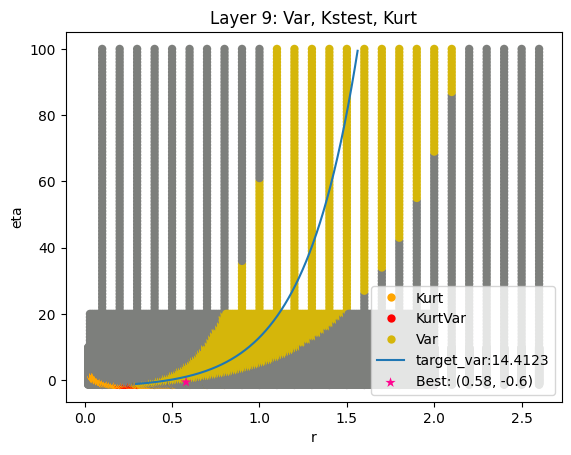

####
Layer  10


100%|██████████| 55966/55966 [05:05<00:00, 183.45it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 589824000.0


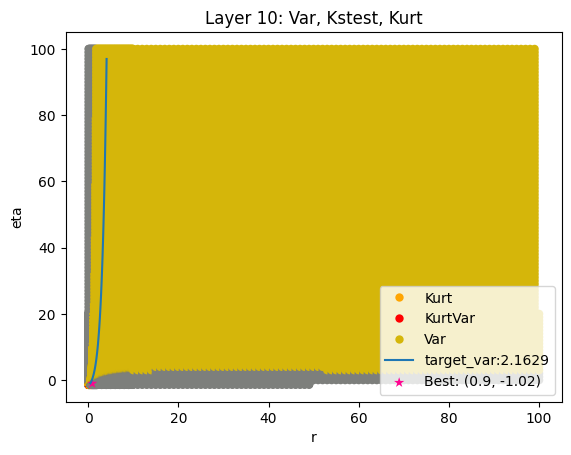

obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21         0.30   
3       561.888369        36000.0       0.22        -0.10   
4      2700.459218       144000.0       0.24        -0.30   
5      7123.889070       576000.0       0.28        -0.30   
6      8727.643776      2304000.0       0.34        -0.20   
7      8606.341394      9216000.0       0.38        -0.30   
8      6916.660564     36864000.0       0.44        -0.40   
9      6425.334046    147456000.0       0.58        -0.60   
10     6695.153257    589824000.0       0.90        -1.02   

       kstest_stat_initial  kstest_stat_cutoff_0.05  
layer                                                
2                 0.013056                 0.014297  
3                 0.012202                 0.007153  
4                 0.009140                 0.003578  
5                 0.007905                 0.001789  
6                 0.007537                 0.000895  
7                 0.004525                 0.000447  
8                 0.005698                 0.000224  
9                 0.007569                 0.000112  
10                0.026810                 0.000056

In [9]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
group_cdf_df_dict_path = Path(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

if RERUN or not master_df_combo_path.exists() or not group_cdf_df_dict_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
    pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(group_cdf_df_dict_path)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

In [10]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))
if not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            best_params_eta0.append(best_param_eta0[0])
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            best_params_eta0.append(master_df.loc[group, 'initial_r'])
    master_df['best_r_eta0'] = best_params_eta0
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  kstest_stat_cutoff_0.05  kstest_stat_eta0  \
layer                                                                   
2                 0.013056                 0.014297          0.021657   
3                 0.012202                 0.007153          0.026819   
4                 0.009140                 0.003578          0.016313   
5                 0.007905                 0.001789          0.015594   
6                 0.007537                 0.000895          0.009959   
7                 0.004525                 0.000447          0.010589   
8                 0.005698                 0.000224          0.014585   
9                 0.007569                 0.000112          0.022312   
10                0.026810                 0.000056          0.117877   

       best_r_eta0  
layer               
2             0.20  
3             0.23  
4             0.26  
5             0.31  
6             0.36  
7             0.42  
8             0.52  
9             0.86  
10            6.20

In [11]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Layer 2


100%|██████████| 969/969 [00:00<00:00, 1823.10it/s]


Finding Minimum after computing 969 CDFs
Iter 1 layer 2 best parameters: ((0.2057, 0.19), 0.010596827410775056)
(0.2056, 0.18), 1000 of 1410
(0.2061, 0.18), 1050 of 1410
(0.2066, 0.18), 1100 of 1410


100%|██████████| 1119/1119 [00:00<00:00, 1868.70it/s]


Finding Minimum after computing 1119 CDFs
Iter 2 layer 2 best parameters: ((0.2053, 0.18), 0.010381734798793785)


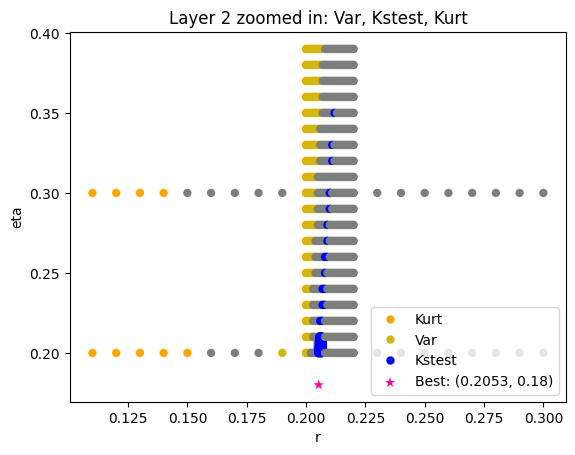

Layer 3


100%|██████████| 852/852 [00:01<00:00, 433.29it/s]


Finding Minimum after computing 852 CDFs
Iter 1 layer 3 best parameters: ((0.2195, -0.094), 0.010630152617947752)
(0.2192, -0.084), 900 of 1293
(0.2201, -0.103), 950 of 1293
(0.2203, -0.095), 1000 of 1293
(0.2205, -0.087), 1050 of 1293


100%|██████████| 1053/1053 [00:02<00:00, 506.23it/s]


Finding Minimum after computing 1053 CDFs
Iter 2 layer 3 best parameters: ((0.2195, -0.094), 0.010630152617947752)


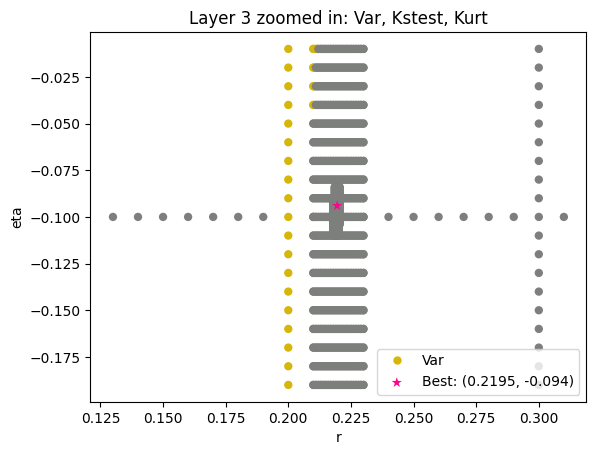

Layer 4


100%|██████████| 873/873 [00:04<00:00, 189.83it/s]


Finding Minimum after computing 873 CDFs
Iter 1 layer 4 best parameters: ((0.2388, -0.309), 0.00853309078565304)
(0.2379, -0.314), 900 of 1314


100%|██████████| 934/934 [00:04<00:00, 188.17it/s]


Finding Minimum after computing 934 CDFs
Iter 2 layer 4 best parameters: ((0.2388, -0.309), 0.00853309078565304)


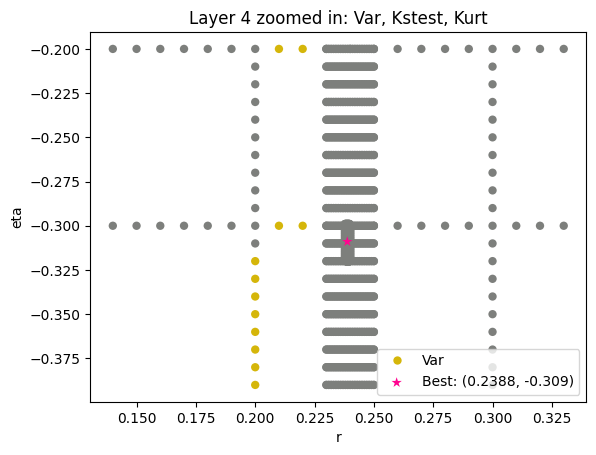

Layer 5


100%|██████████| 873/873 [00:04<00:00, 182.58it/s]


Finding Minimum after computing 873 CDFs
Iter 1 layer 5 best parameters: ((0.2773, -0.326), 0.007389538091831155)
(0.2764, -0.331), 900 of 1314
(0.2766, -0.323), 950 of 1314
(0.2769, -0.336), 1000 of 1314
(0.2774, -0.331), 1050 of 1314
(0.2783, -0.335), 1100 of 1314


100%|██████████| 1104/1104 [00:05<00:00, 186.55it/s]


Finding Minimum after computing 1104 CDFs
Iter 2 layer 5 best parameters: ((0.2773, -0.326), 0.007389538091831155)


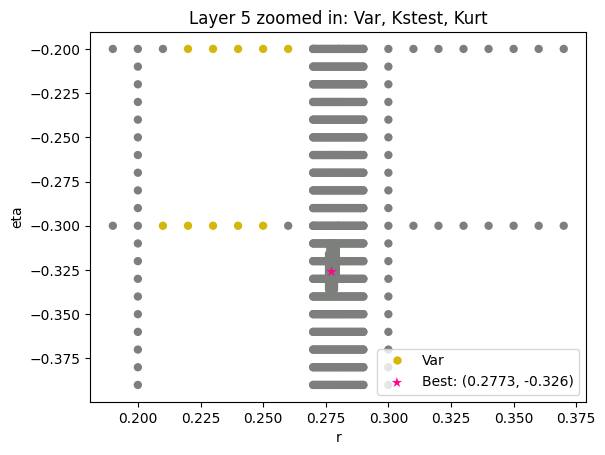

Layer 6


100%|██████████| 876/876 [00:04<00:00, 187.87it/s]


Finding Minimum after computing 876 CDFs
Iter 1 layer 6 best parameters: ((0.329, -0.265), 0.005415159963211513)
(0.3281, -0.273), 900 of 1317
(0.3283, -0.265), 950 of 1317
(0.3285, -0.257), 1000 of 1317
(0.3288, -0.27), 1050 of 1317
(0.3292, -0.272), 1100 of 1317


100%|██████████| 1141/1141 [00:06<00:00, 187.67it/s]


Finding Minimum after computing 1141 CDFs
Iter 2 layer 6 best parameters: ((0.328, -0.274), 0.005318483158090914)


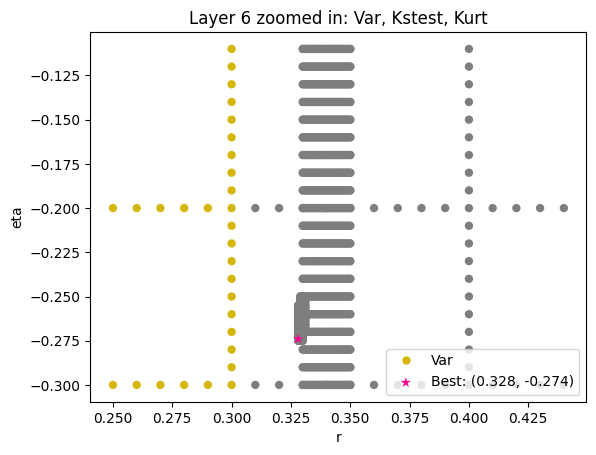

Layer 7


100%|██████████| 873/873 [00:04<00:00, 190.86it/s]


Finding Minimum after computing 873 CDFs
Iter 1 layer 7 best parameters: ((0.3784, -0.305), 0.004259620706075884)
(0.3775, -0.31), 900 of 1314
(0.3777, -0.302), 950 of 1314
(0.378, -0.315), 1000 of 1314
(0.379, -0.315), 1050 of 1314


100%|██████████| 1074/1074 [00:05<00:00, 190.15it/s]


Finding Minimum after computing 1074 CDFs
Iter 2 layer 7 best parameters: ((0.3784, -0.305), 0.004259620706075884)


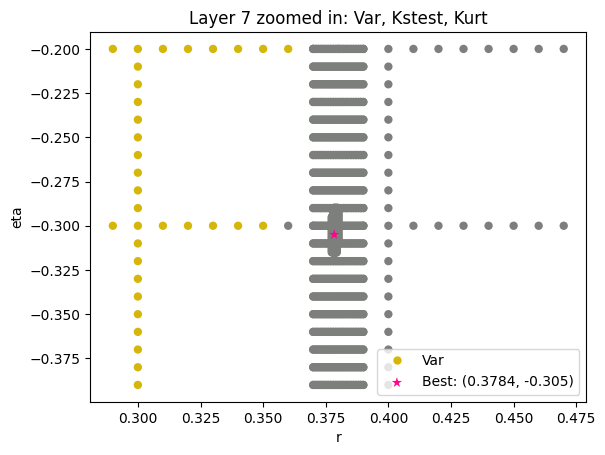

Layer 8


100%|██████████| 855/855 [00:04<00:00, 189.47it/s]


Finding Minimum after computing 855 CDFs
Iter 1 layer 8 best parameters: ((0.429, -0.434), 0.004092167244442613)
(0.4282, -0.442), 900 of 1296
(0.4284, -0.434), 950 of 1296
(0.4286, -0.426), 1000 of 1296
(0.4289, -0.439), 1050 of 1296
(0.4298, -0.442), 1100 of 1296


100%|██████████| 1109/1109 [00:08<00:00, 137.74it/s]


Finding Minimum after computing 1109 CDFs
Iter 2 layer 8 best parameters: ((0.4281, -0.438), 0.004014923868808973)


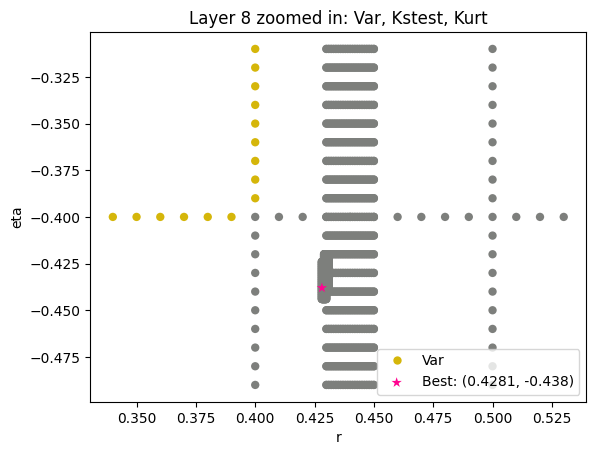

Layer 9


100%|██████████| 855/855 [00:04<00:00, 184.31it/s]


Finding Minimum after computing 855 CDFs
Iter 1 layer 9 best parameters: ((0.569, -0.611), 0.00655179144257566)
(0.5682, -0.619), 900 of 1296
(0.5684, -0.611), 950 of 1296
(0.5686, -0.603), 1000 of 1296
(0.5689, -0.616), 1050 of 1296


100%|██████████| 1076/1076 [00:03<00:00, 296.99it/s]
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


Finding Minimum after computing 1076 CDFs
Iter 2 layer 9 best parameters: ((0.5681, -0.613), 0.006502485687999141)


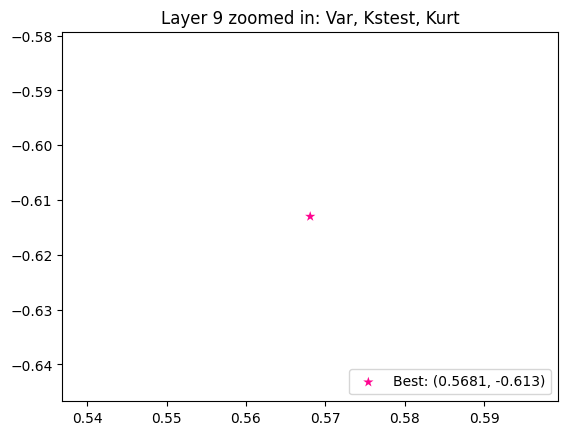

Layer 10


100%|██████████| 855/855 [00:02<00:00, 302.12it/s]


Finding Minimum after computing 855 CDFs
Iter 1 layer 10 best parameters: ((1.142, -1.013), 0.026809999999987844)
(1.1412, -1.019), 900 of 1275
(1.1414, -1.011), 950 of 1275
(1.1416, -1.003), 1000 of 1275
(1.1419, -1.016), 1050 of 1275


100%|██████████| 1093/1093 [00:03<00:00, 299.04it/s]
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


Finding Minimum after computing 1093 CDFs
Iter 2 layer 10 best parameters: ((1.1418, -1.013), 0.026809999999987844)


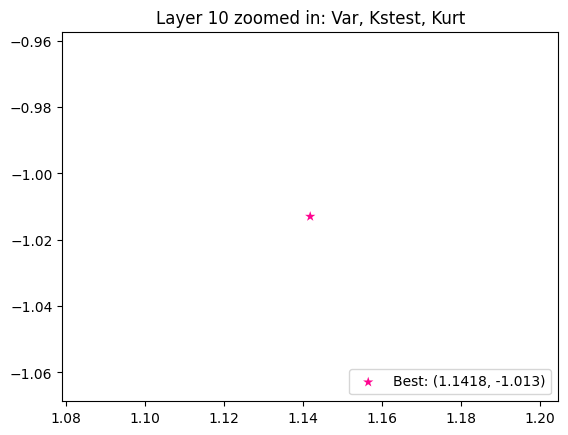

obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  ...  best_r  best_eta  kstest_stat_best  iter1_r  \
layer                       ...                                                
2                 0.013056  ...  0.2053     0.180          0.010382   0.2057   
3                 0.012202  ...  0.2195    -0.094          0.010630   0.2195   
4                 0.009140  ...  0.2388    -0.309          0.008533   0.2388   
5                 0.007905  ...  0.2773    -0.326          0.007390   0.2773   
6                 0.007537  ...  0.3280    -0.274          0.005318   0.3290   
7                 0.004525  ...  0.3784    -0.305          0.004260   0.3784   
8                 0.005698  ...  0.4281    -0.438          0.004015   0.4290   
9                 0.007569  ...  0.5681    -0.613          0.006502   0.5690   
10                0.026810  ...  1.1418    -1.013          0.026810   1.1420   

       iter1_eta  kstest_stat_iter1  iter2_r  iter2_eta  kstest_stat_iter2  \
layer                                                                        
2          0.190           0.010597   0.2053      0.180           0.010382   
3         -0.094           0.010630   0.2195     -0.094           0.010630   
4         -0.309           0.008533   0.2388     -0.309           0.008533   
5         -0.326           0.007390   0.2773     -0.326           0.007390   
6         -0.265           0.005415   0.3280     -0.274           0.005318   
7         -0.305           0.004260   0.3784     -0.305           0.004260   
8         -0.434           0.004092   0.4281     -0.438           0.004015   
9         -0.611           0.006552   0.5681     -0.613           0.006502   
10        -1.013           0.026810   1.1418     -1.013           0.026810   

       n_pval_0.05  
layer               
2            17085  
3            17085  
4            25627  
5            34171  
6            68343  
7           102514  
8           115327  
9            45562  
10            2530  

[9 rows x 23 columns]

In [12]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [2]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(-1, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group]
            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

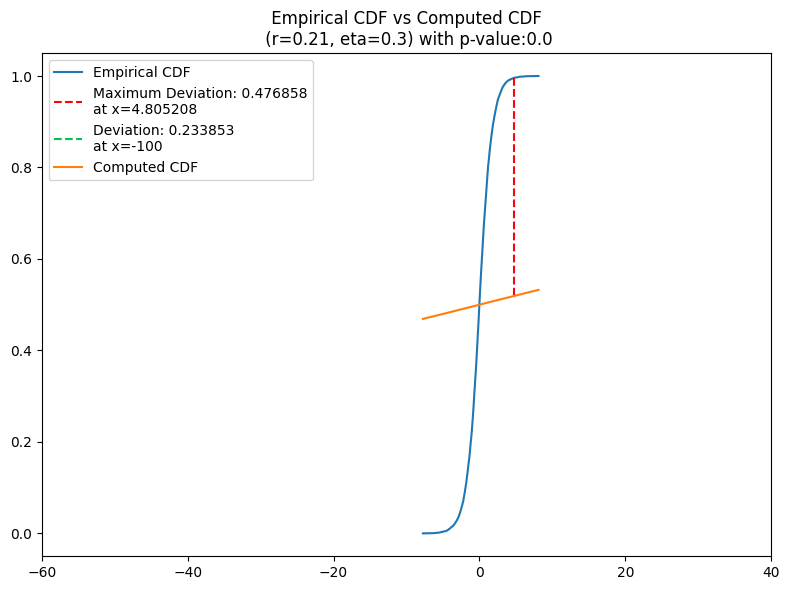

In [13]:
# Example Cell
group = 2
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

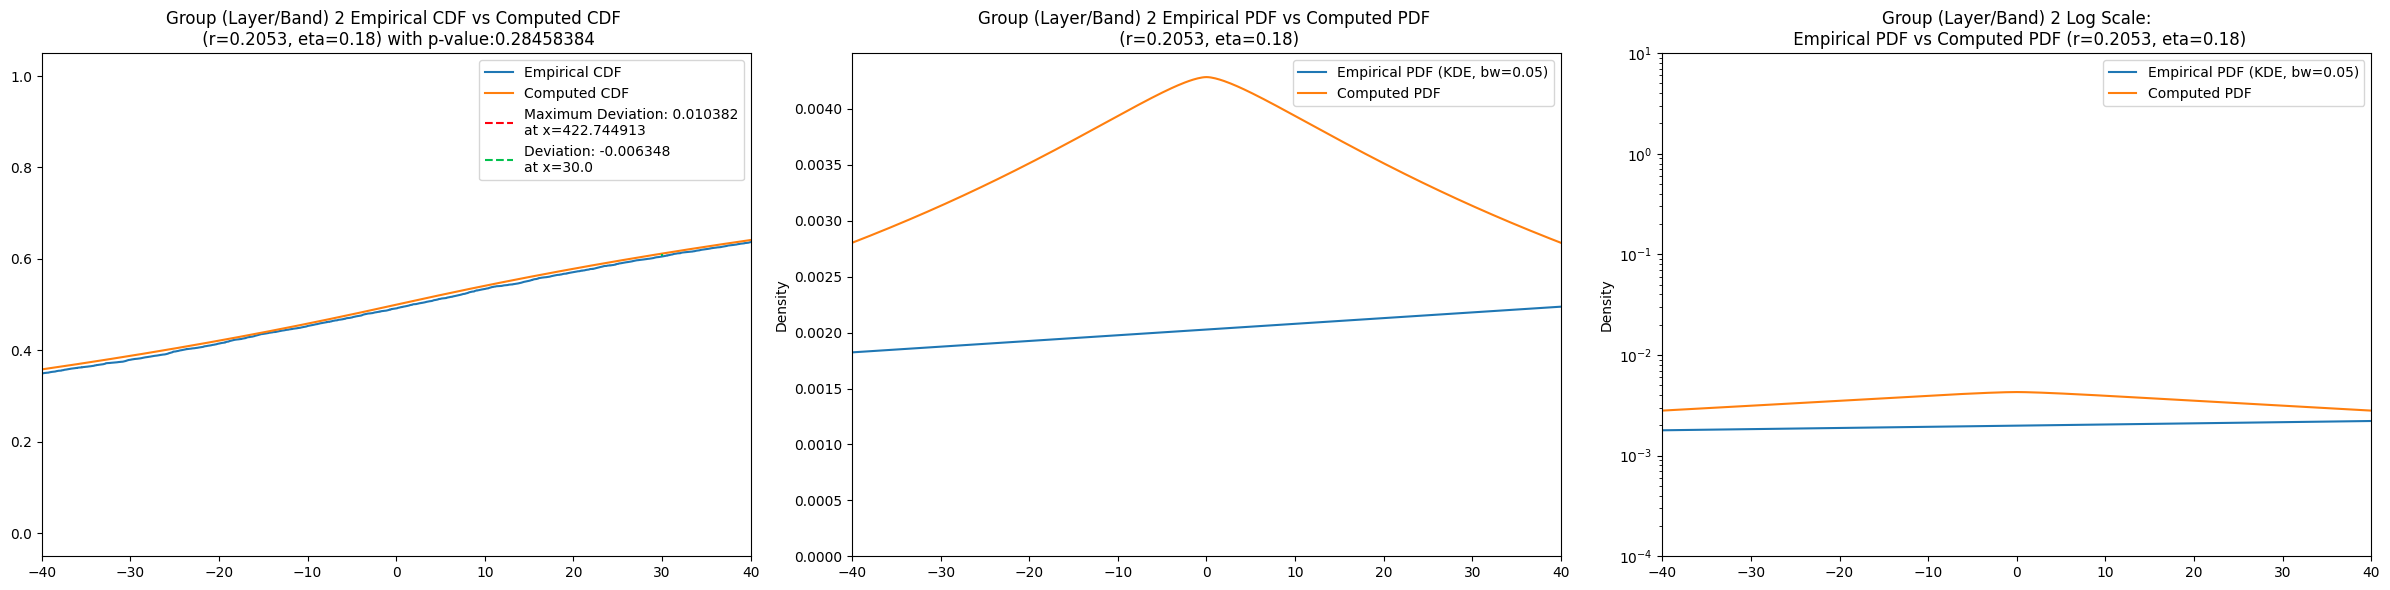

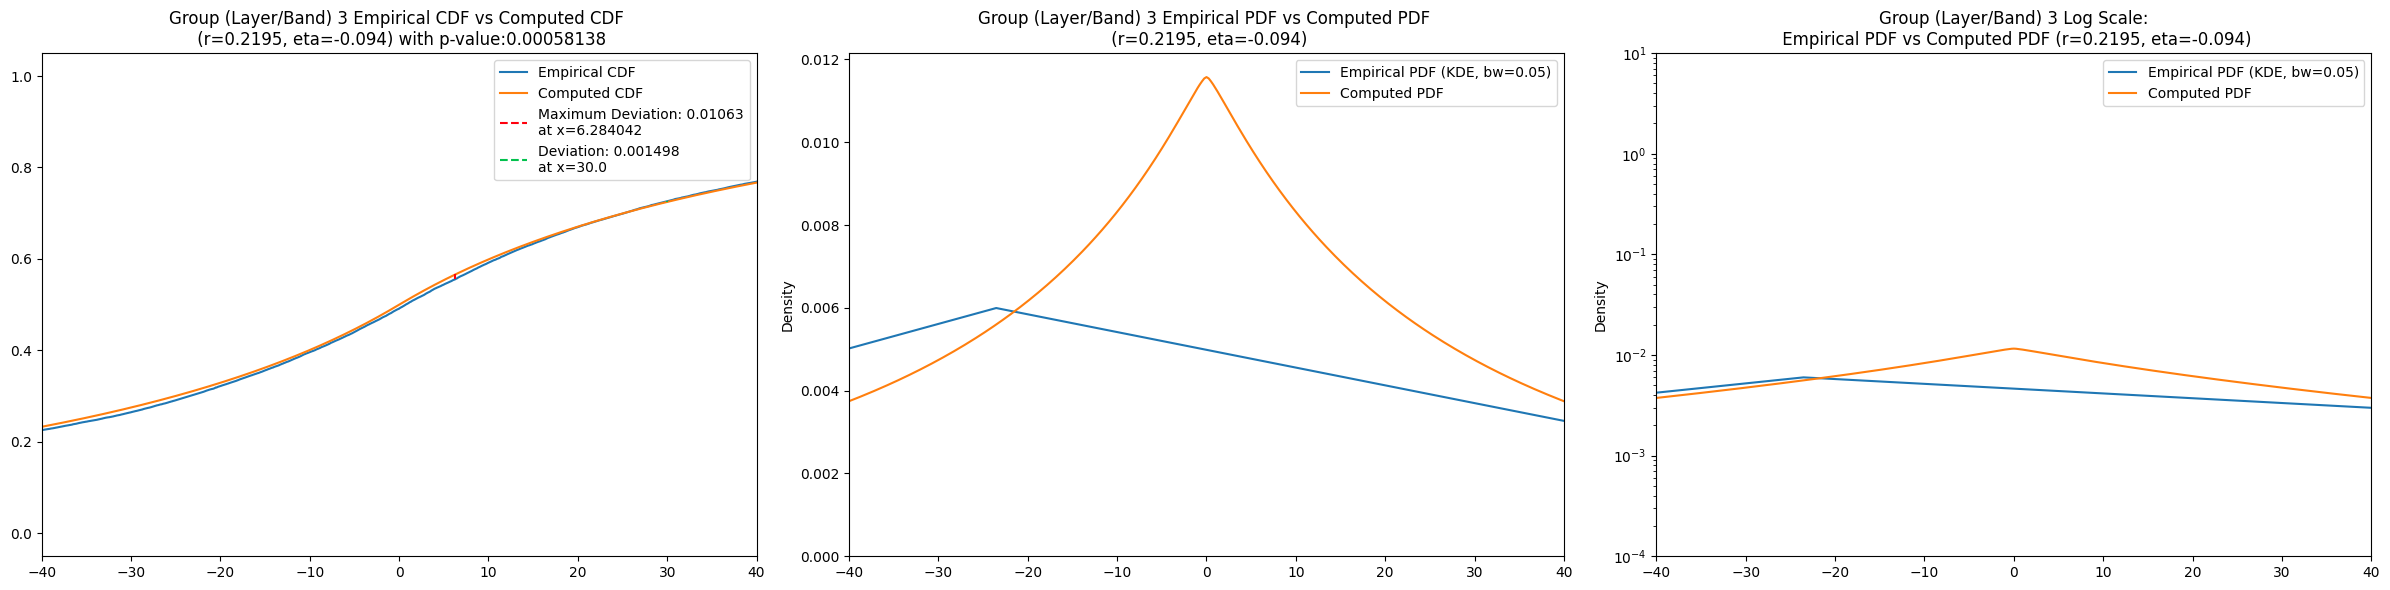

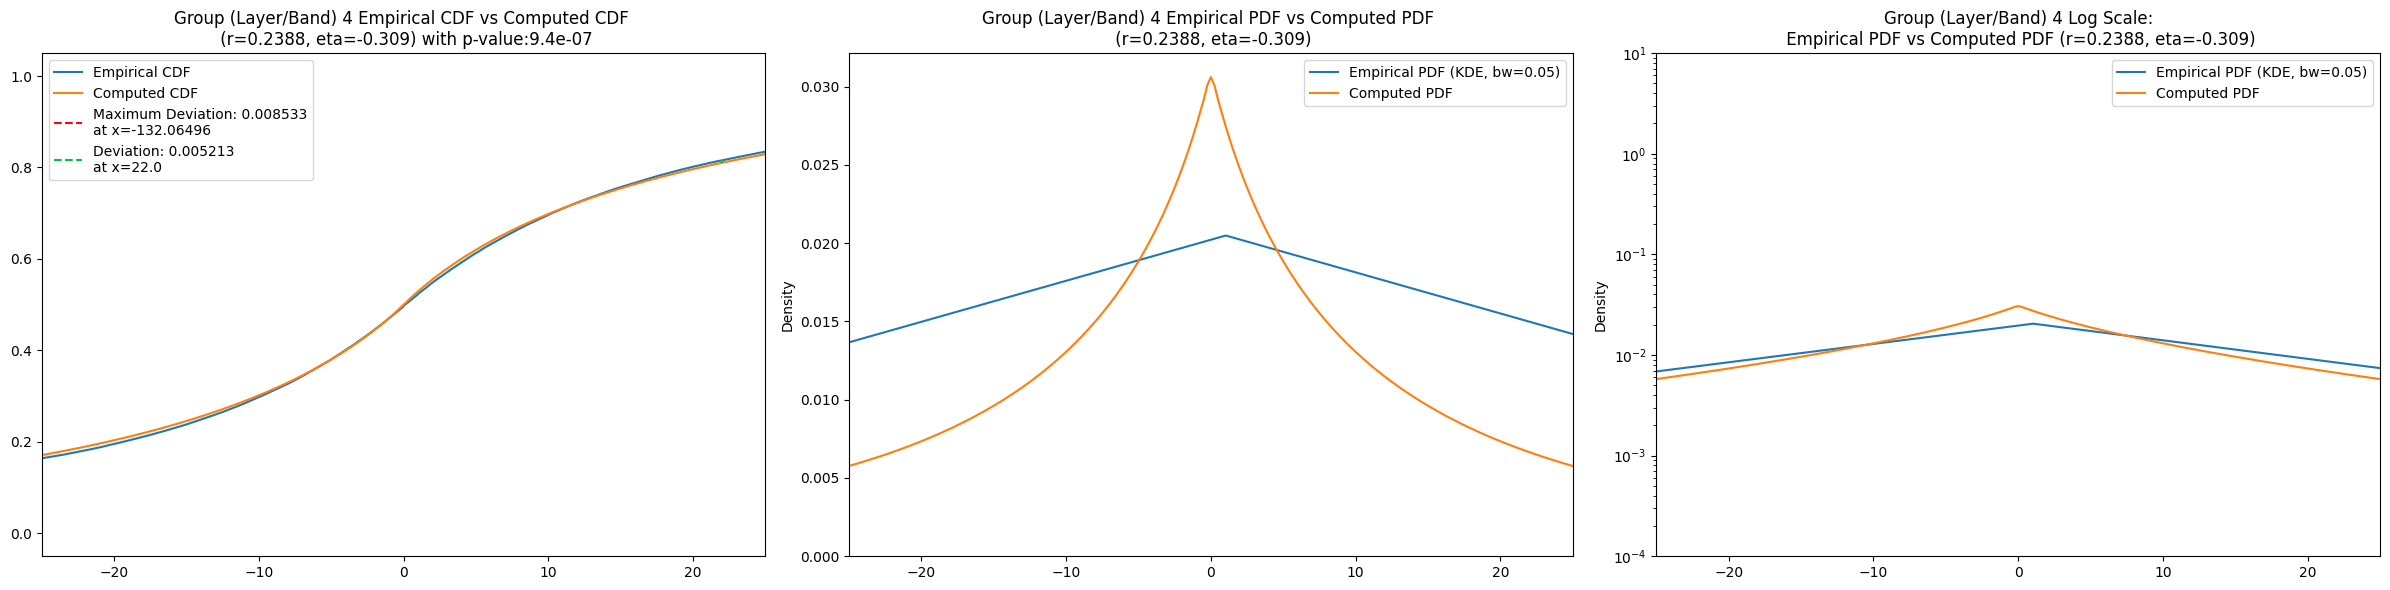

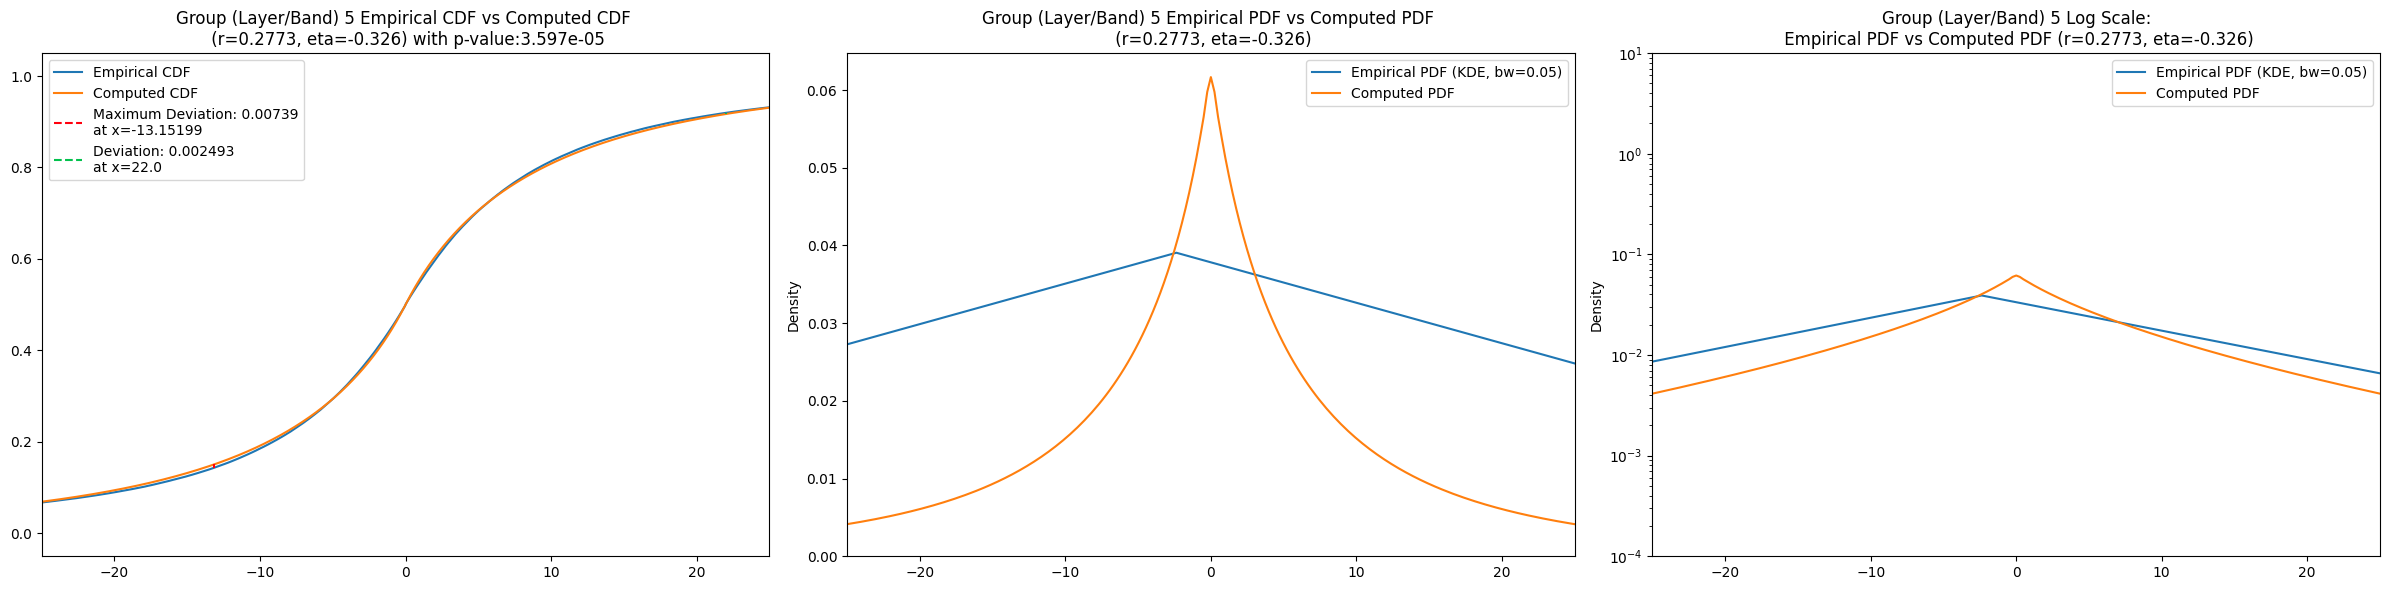

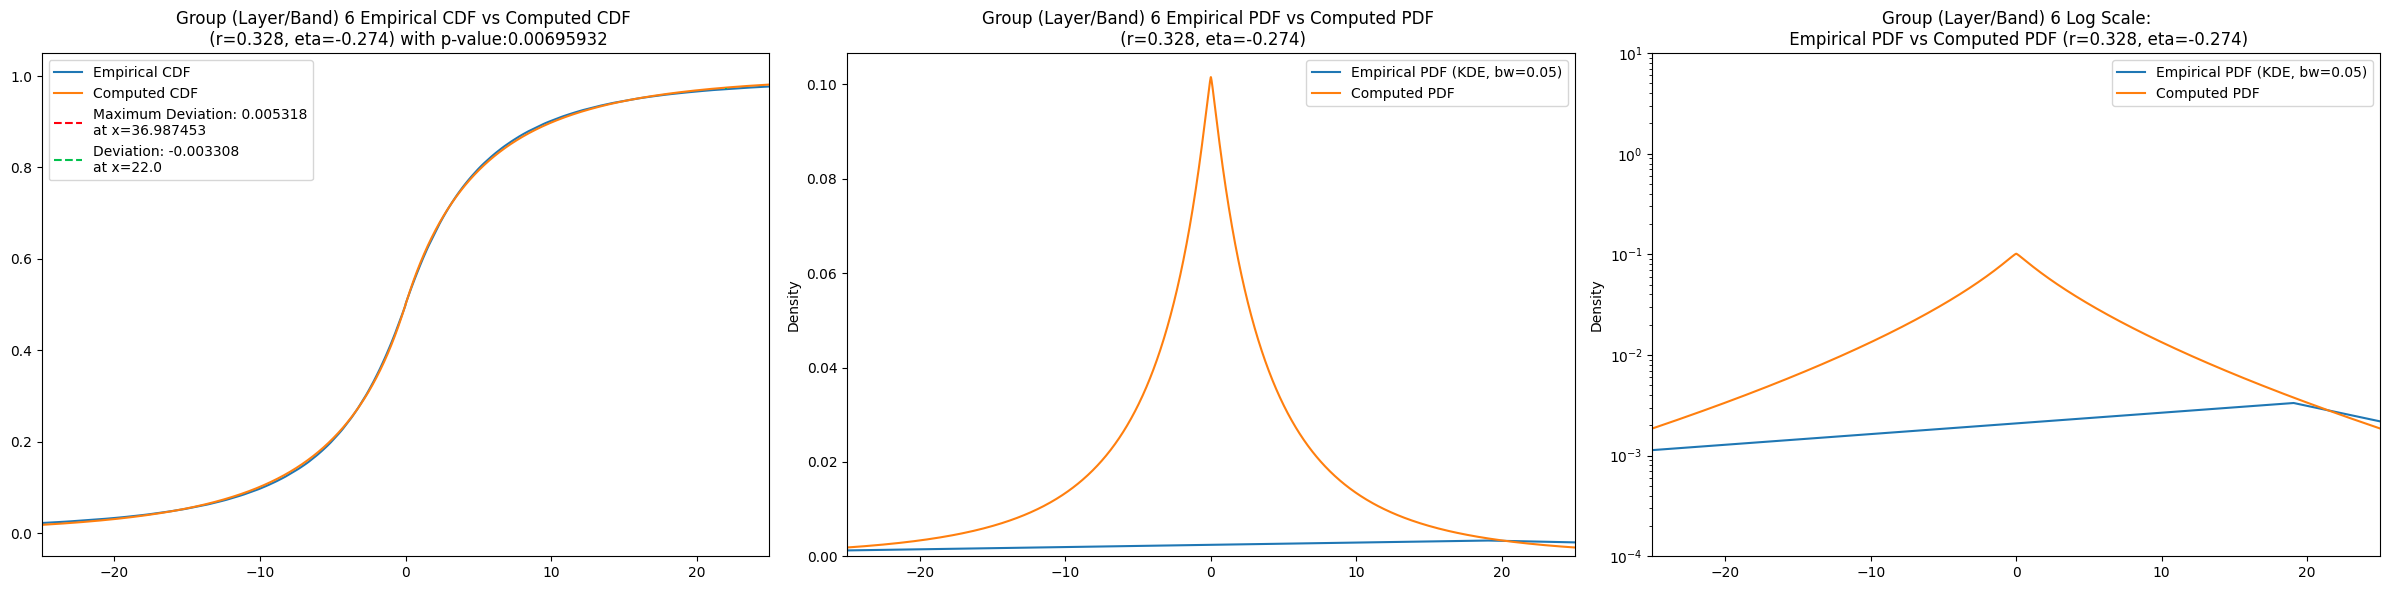

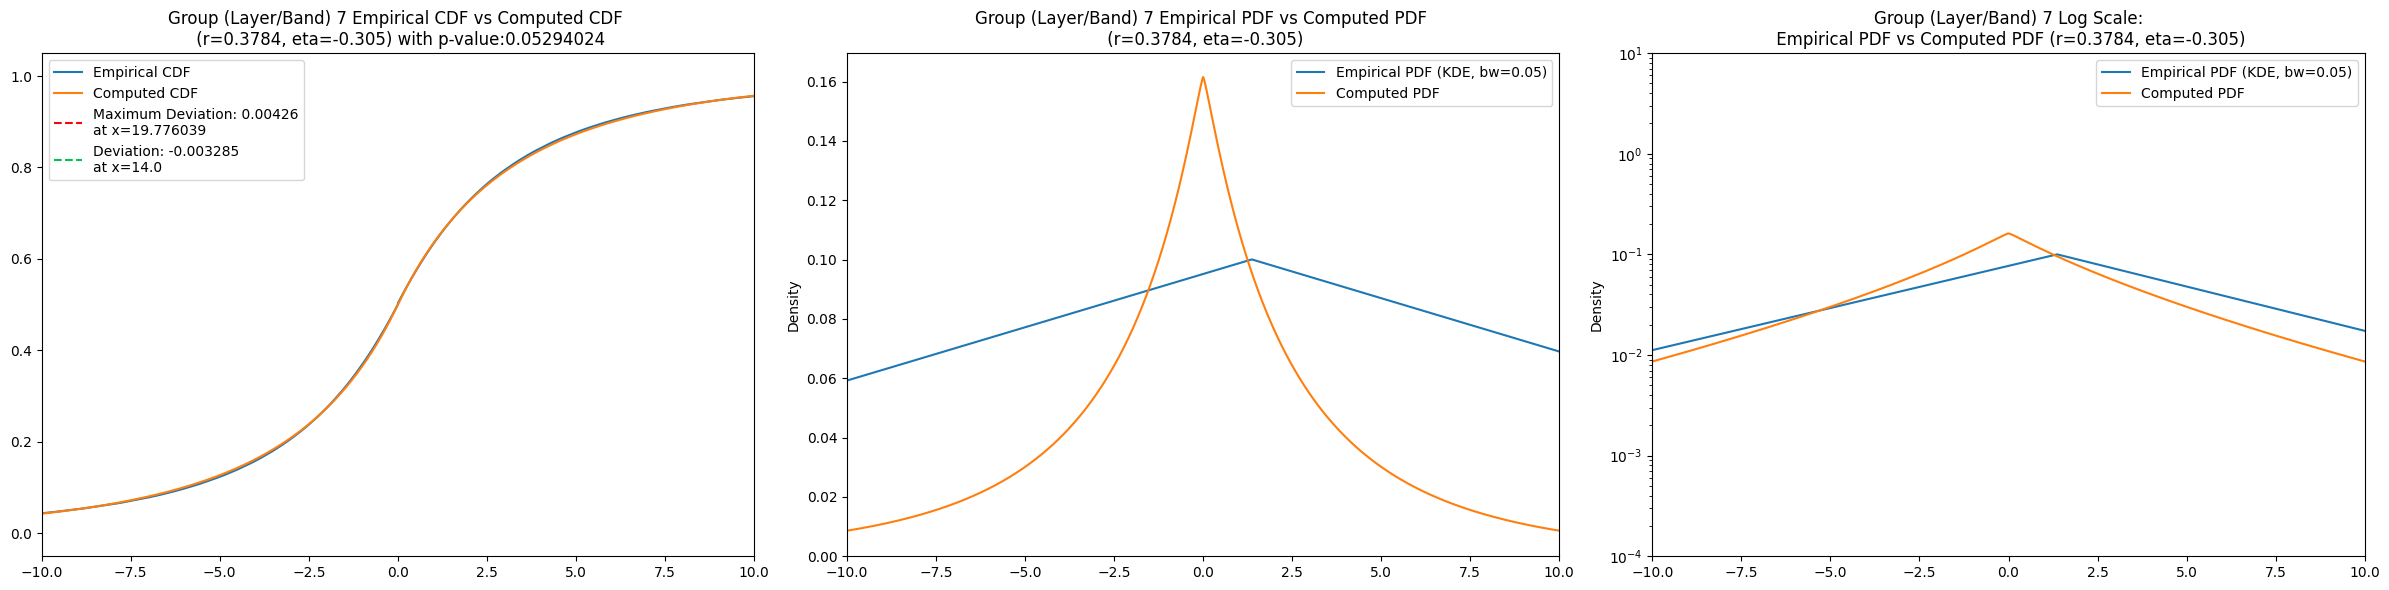

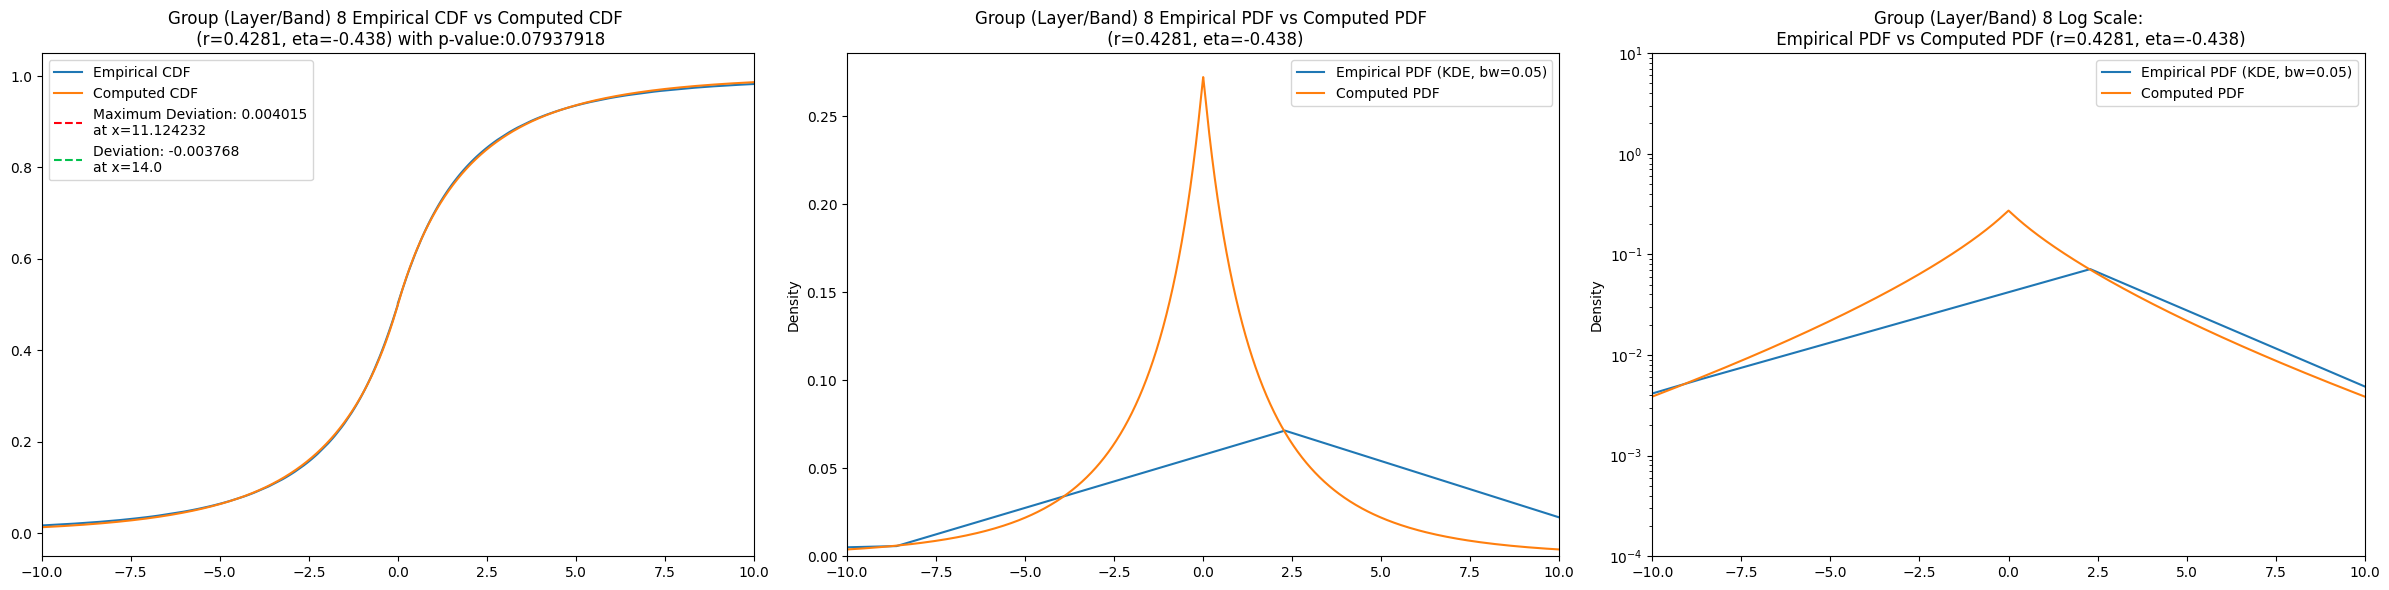

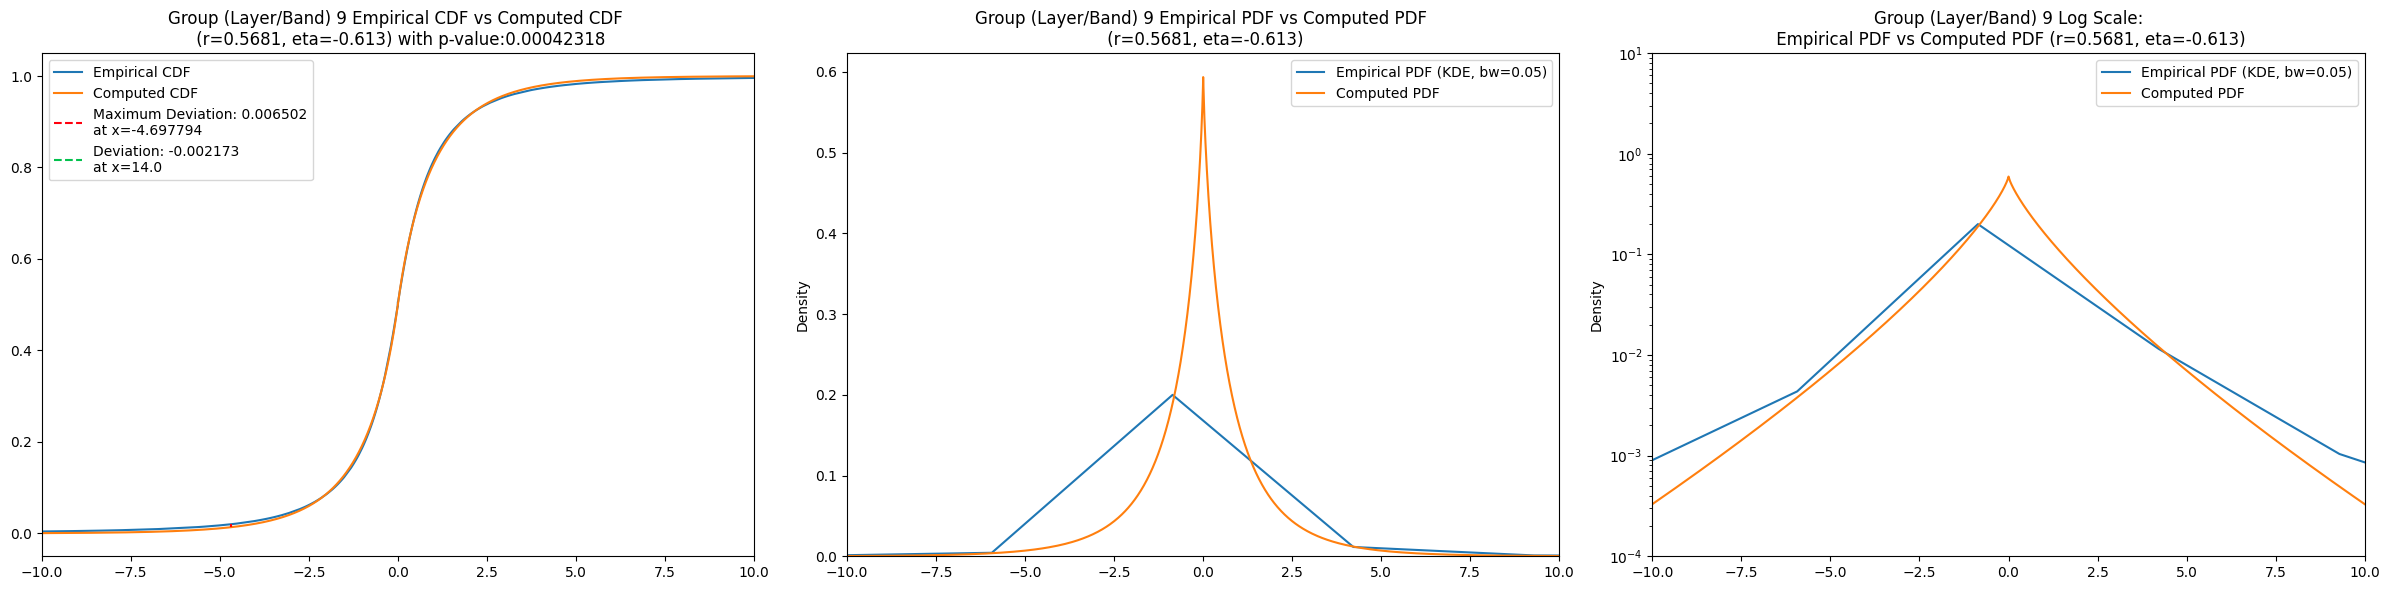

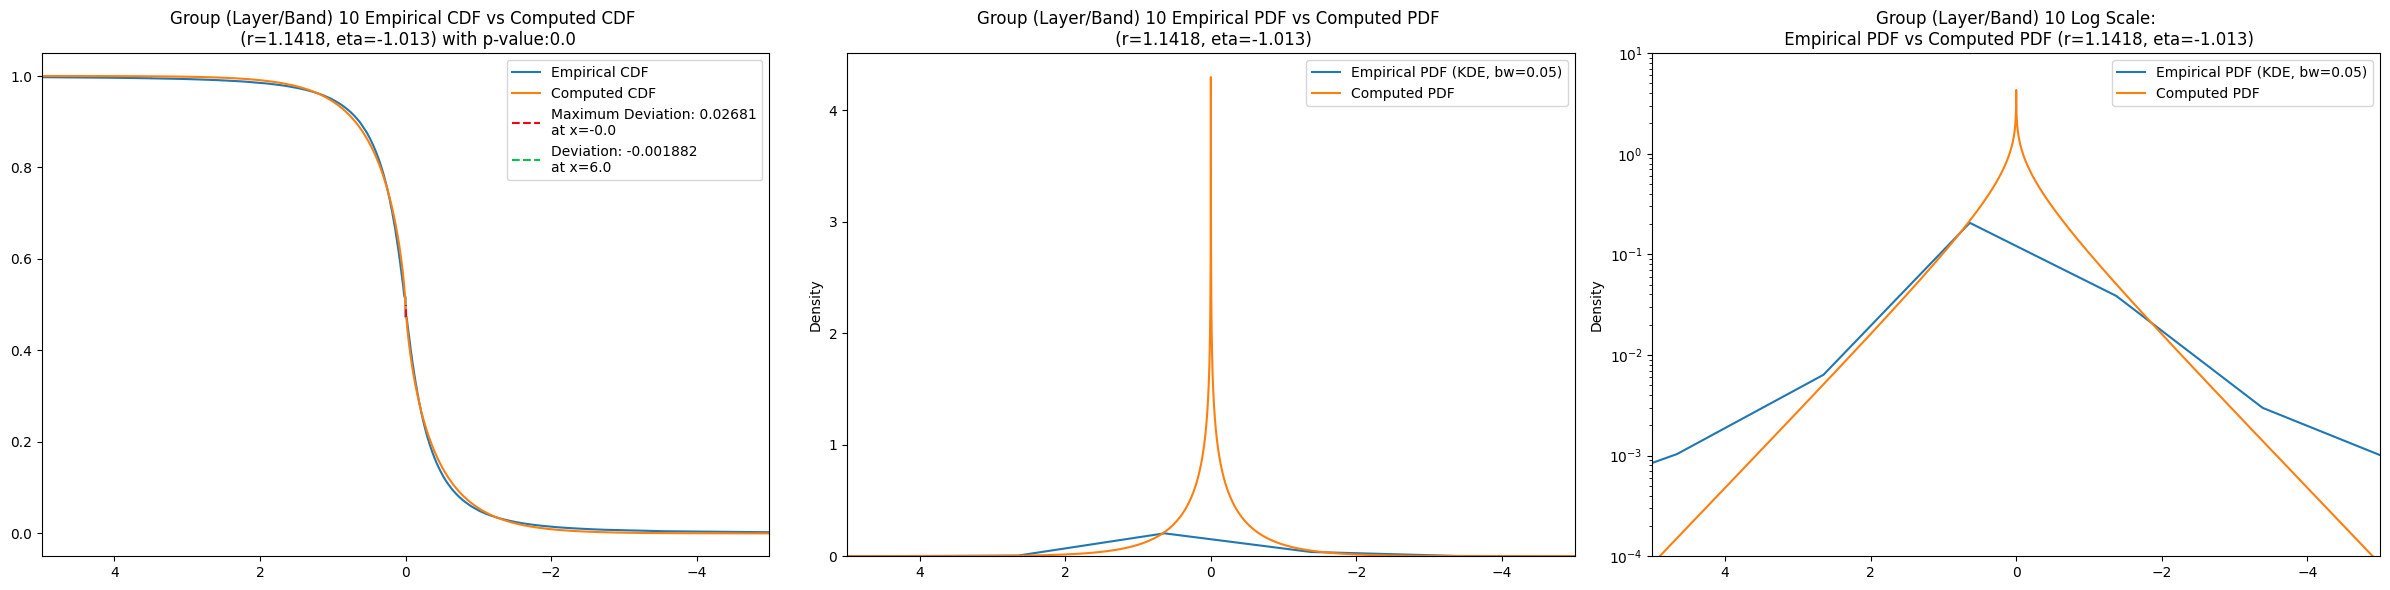

In [14]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [15]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [16]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  ...  param_gaussian  kstest_stat_gaussian  \
layer                       ...                                         
2                 0.013056  ...      161.315000              0.054731   
3                 0.012202  ...       64.387600              0.057965   
4                 0.009140  ...       26.435600              0.054962   
5                 0.007905  ...       12.264400              0.048018   
6                 0.007537  ...        6.732320              0.041889   
7                 0.004525  ...        4.053460              0.040115   
8                 0.005698  ...        2.495400              0.042227   
9                 0.007569  ...        1.214770              0.042277   
10                0.026810  ...        0.426317              0.043705   

       kstest_pval_gaussian  param_laplace  kstest_stat_laplace  \
layer                                                             
2              7.138960e-24     142.176000             0.028658   
3             1.396570e-105      57.121400             0.031868   
4              0.000000e+00      23.537300             0.029317   
5              0.000000e+00      10.938100             0.022895   
6              0.000000e+00       5.972800             0.016282   
7              0.000000e+00       3.588460             0.013913   
8              0.000000e+00       2.200810             0.015294   
9              0.000000e+00       1.073640             0.015960   
10             0.000000e+00       0.337135             0.026810   

       kstest_pval_laplace     param_t  kstest_stat_t  kstest_pval_t  \
layer                                                                  
2             7.442110e-07  111.133000       0.028436   9.344680e-07   
3             3.385140e-32   45.020700       0.029345   2.298580e-27   
4            5.892970e-108   18.353100       0.026335   3.414980e-87   
5            1.012760e-262    8.580430       0.018531  3.032770e-172   
6             0.000000e+00    4.733350       0.013603   0.000000e+00   
7             0.000000e+00    2.852480       0.013148   0.000000e+00   
8             0.000000e+00    1.757550       0.015197   0.000000e+00   
9             0.000000e+00    0.855090       0.014041   0.000000e+00   
10            0.000000e+00    0.302689       0.026810   0.000000e+00   

       kstest_pval_gengamma  
layer                        
2              2.845834e-01  
3              5.813810e-04  
4    

In [17]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

# Results

In [20]:
import pandas as pd
import git
from pathlib import Path
import os
DATA_NAME = 'batch0approx1e5-agriVision-wavelet-red'
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
CWD


master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)

In [21]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  ...  param_gaussian  kstest_stat_gaussian  \
layer                       ...                                         
2                 0.013056  ...      161.315000              0.054731   
3                 0.012202  ...       64.387600              0.057965   
4                 0.009140  ...       26.435600              0.054962   
5                 0.007905  ...       12.264400              0.048018   
6                 0.007537  ...        6.732320              0.041889   
7                 0.004525  ...        4.053460              0.040115   
8                 0.005698  ...        2.495400              0.042227   
9                 0.007569  ...        1.214770              0.042277   
10                0.026810  ...        0.426317              0.043705   

       kstest_pval_gaussian  param_laplace  kstest_stat_laplace  \
layer                                                             
2              7.138960e-24     142.176000             0.028658   
3             1.396570e-105      57.121400             0.031868   
4              0.000000e+00      23.537300             0.029317   
5              0.000000e+00      10.938100             0.022895   
6              0.000000e+00       5.972800             0.016282   
7              0.000000e+00       3.588460             0.013913   
8              0.000000e+00       2.200810             0.015294   
9              0.000000e+00       1.073640             0.015960   
10             0.000000e+00       0.337135             0.026810   

       kstest_pval_laplace     param_t  kstest_stat_t  kstest_pval_t  \
layer                                                                  
2             7.442110e-07  111.133000       0.028436   9.344680e-07   
3             3.385140e-32   45.020700       0.029345   2.298580e-27   
4            5.892970e-108   18.353100       0.026335   3.414980e-87   
5            1.012760e-262    8.580430       0.018531  3.032770e-172   
6             0.000000e+00    4.733350       0.013603   0.000000e+00   
7             0.000000e+00    2.852480       0.013148   0.000000e+00   
8             0.000000e+00    1.757550       0.015197   0.000000e+00   
9             0.000000e+00    0.855090       0.014041   0.000000e+00   
10            0.000000e+00    0.302689       0.026810   0.000000e+00   

       kstest_pval_gengamma  
layer                        
2              2.845834e-01  
3              5.813810e-04  
4    